## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing:

#Data Cleaning Process
#Reading data; have to use encoding='latin1' to be able to run correctly
df = pd.read_csv('data.csv',encoding='latin1')

#Checking what the dataset looks like, there are 541,909 rows and 9 columns
#df.shape
#df.head(5)
#df.columns

#Checking the datatypes for the columns in the dataset
#print(df.dtypes)


#Checking for Missing Values
df.isna().sum()
#(Done) missing 1454 in description
#(Done) missing 135080 in customer ID
#Checking to see what the row looks like for missing values in the 'Description' Column
    #rows_with_missing_values = df[df['Description'].isnull()]
    #print(rows_with_missing_values.head(5))
#Checking to see what the row looks like for missing values in the 'CustomerID' Column
    #rows_with_missing_values = df[df['CustomerID'].isnull()]
    #print(rows_with_missing_values.head(5))
#can't identify which customer made the transaction nor the item in question - can't do anything about those so just dropped them
df.dropna(inplace=True, axis=0)
#print('Description Column Missing Values:',df['Description'].isna().sum())
#print('CustomerID Column Missing Values:',df['CustomerID'].isna().sum())
#print('Dataset Shape:',df.shape)

#Checking for Duplicates
#print('Pre-Check for Duplicated Data: ' + str(df.duplicated().sum()))
#Duplicated Data here indicates that all columns are identical (including transaction time) suggesting these might be recording error, decided to drop them
df.drop_duplicates(inplace=True)
#print('Post-Check for Duplicated Data: ' + str(df.duplicated().sum()))


#Cleaning Quantity Column
#df['Quantity'].describe()
#Create a new column - some Quantities have negative values; filtered them out and indicate that they are Canceled/Returned Items
#Create New Column ['Item Returned Indicator'] and set default value as 'Item Purchased'
df['Item Returned Indicator']='Item Purchased'
#Loop through the dataset rows, if the Quantity is less than 0, update value of ['Item Returned Indicator'] as 'Item Returned/Canceled'
for index, row in df.iterrows():
    if row['Quantity'] < 0:
        df.at[index, 'Item Returned Indicator'] = 'Item Returned/Canceled'
#Sample of Changes Made: -> #negative_quantity_rows = df[df['Quantity'] < 0]     #print(negative_quantity_rows.tail(5))


#Cleaning UnitPrice Column
#df['UnitPrice'].describe() #There are 0 values for UnitPrice, as Min = 0, There are 44 Total Rows where UnitPrice is 0
#unitprice_check = df[df['UnitPrice']==0]['UnitPrice'].value_counts()
#print(unitprice_check)
#0 for UnitPrice might be promotional sales or giveaways; decided to remove them
#Removing rows where UnitPrice is 0
df = df[df['UnitPrice'] > 0]


#Cleaning Stock Code Column
#Examining StockCodes; 3684 unique codes, with 85123A being most frequent with 2065 counts
df['StockCode'].describe()
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10)
#StockCode has anomalies; (ex. POST is 8th most common StockCode) and StockCode has varying length
top_10_stock_codes = df['StockCode'].value_counts().head(10)
#print(top_10_stock_codes)

#Checking varying lengths of StockCode
stockcode_lengths = df['StockCode'].str.len()
length_occurrences = stockcode_lengths.value_counts()
#print(length_occurrences)

#Checking number of numeric characters in each stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(df['StockCode'].unique()).apply(lambda x: sum(c.isdigit() for c in str(x)))
counts_of_numeric_characters = numeric_char_counts_in_unique_codes.value_counts()
#print(counts_of_numeric_characters) #3676 unique characters with 5 numbers, 7 codes with no numbers, 1 code with 1 number
strange_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]
#print(strange_stock_codes) #Decided to remove these anomalies from the dataset
df = df[~df['StockCode'].isin(strange_stock_codes)] #Remaining 399656 rows, 9 columns
#print(df.shape)


#Cleaning Description Column
description_counts = df['Description'].value_counts()
top_10_descriptions = description_counts[:10]
#print(top_10_descriptions)
#Checking for lowercase descriptions - will need to standardize
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]
#Remove rows with non-product descriptions
non_product_descriptions = ["Next Day Carriage", "High Resolution Image"]
df = df[~df['Description'].isin(non_product_descriptions)]
#Standardize all descriptions into uppercase letters
df['Description'] = df['Description'].str.upper()
#print(df.shape)

#Conversion of InvoiceDate Column to DateTime Values
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
#print('Checking For Successful Conversion of InvoiceDate column to DateTime:', df['InvoiceDate'].dtype)

print('Data Cleaned: ',df.shape)

Data Cleaned:  (399573, 9)


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Item Returned Indicator
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Item Purchased
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Item Purchased
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Item Purchased
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Item Purchased
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Item Purchased
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Item Purchased


In [2]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Item Returned Indicator'],
      dtype='object')


## RFM Calculation

In [14]:
import pandas as pd
from datetime import datetime

#Task 2 RFM Calculation
# Calculate Recency, Frequency, and Monetary metrics
current_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Recency (R)
#recency_df is created by grouping the data by 'CustomerID' and finding the maximum 'InvoiceDate' for each customer.
#The difference between the current_date and the last purchase date is calculated to get the Recency in days.
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (current_date - recency_df['InvoiceDate']).dt.days
recency_df = recency_df[['CustomerID', 'Recency']]

# Frequency (F)
#frequency_df is created by grouping the data by 'CustomerID' and counting the unique 'InvoiceNo' for each customer.
#This represents the number of orders made by each customer.
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Monetary (M)
#monetary_df is created by grouping the data by 'CustomerID' and summing the 'Quantity' and 'UnitPrice' columns for each customer.
#The result is the total monetary value of purchases for each customer.
monetary_df = df.groupby('CustomerID')[['Quantity', 'UnitPrice']].sum().reset_index()
monetary_df['Monetary'] = monetary_df['Quantity'] * monetary_df['UnitPrice']
monetary_df = monetary_df[['CustomerID', 'Monetary']]

# Merge Recency, Frequency, and Monetary metrics
rfm_df = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm_df = pd.merge(rfm_df, monetary_df, on='CustomerID')

# Display the resulting RFM DataFrame
print(rfm_df.head())

   CustomerID  Recency  Frequency    Monetary
0     12346.0      326          2        0.00
1     12347.0        2          7  1182814.18
2     12348.0       75          4    43631.72
3     12349.0       19          1   192213.00
4     12350.0      310          1     4958.80


In [15]:
customer_data = df[df['CustomerID'] == 12346.0]
print(customer_data[['CustomerID', 'InvoiceDate', 'Quantity', 'UnitPrice']])
#There is an unethical customer canceled his/her transaction.
#Which will cause the monetary to be 0 when frequency is not 0.

       CustomerID         InvoiceDate  Quantity  UnitPrice
61619     12346.0 2011-01-18 10:01:00     74215       1.04
61624     12346.0 2011-01-18 10:17:00    -74215       1.04


## RFM Segmentation

In [16]:
#Task3. RFM Segmentation
import warnings
warnings.filterwarnings('ignore')
'''
We assign a score from 1 to 4 to Recency, Frequency and Monetary.
Four is the best/highest value, one is the lowest/worst value.
A final RFM score is calculated simply by combining individual RFM score numbers.
'''
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

quantiles.to_dict()


#High Recency is bad, indicates a customer haven’t purchased for a long time
#Arguments (x = value, p = recency, monetary, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

#High Frequency and Monetary value is good, indicates an valuable customer
#Arguments (x = value, p = recency, monetary, frequency, d = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

#Assign RFM scores to each customer based on their quartiles.
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

#Combine the RFM scores to create a single RFM score for each customer
rfm_segmentation.head()

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

#Best Recency score = 4: most recently purchase.
#Best Frequency score = 4: most quantity purchase.
#Best Monetary score = 4: spent the most.

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,326,2,0.00,1,2,1,121
1,12347.0,2,7,1182814.18,4,4,4,444
2,12348.0,75,4,43631.72,2,3,3,233
3,12349.0,19,1,192213.00,3,1,3,313
4,12350.0,310,1,4958.80,1,1,1,111


## Customer Segmentation

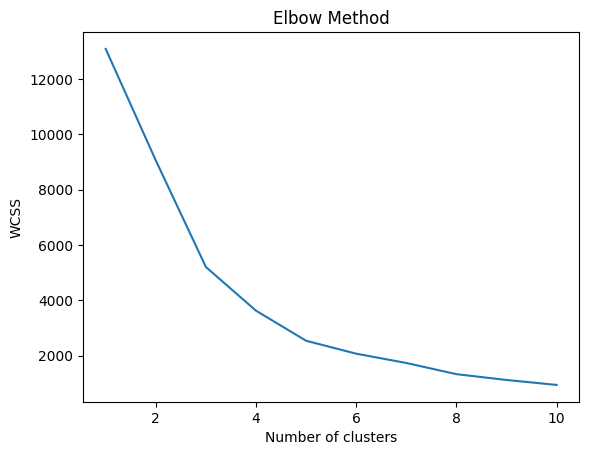

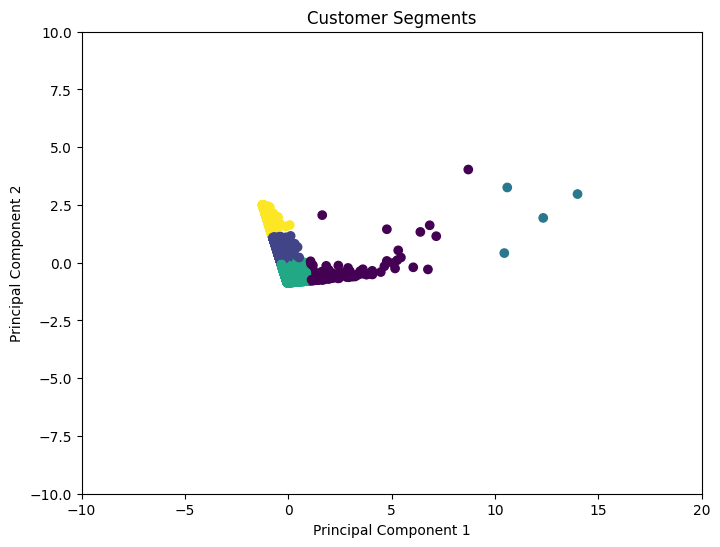

In [17]:
# Task 4:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming rfm_segmentation is your DataFrame from Task 3
rfm_data = rfm_segmentation[['Recency', 'Frequency', 'Monetary']]

# Normalize the data
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data)

# Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_normalized)

# Add the cluster data to the original DataFrame
rfm_segmentation['Cluster'] = clusters

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(rfm_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.xlim(-10, 20)  # Set limits for x-axis
plt.ylim(-10, 10)  # Set limits for y-axis
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments')
plt.show()

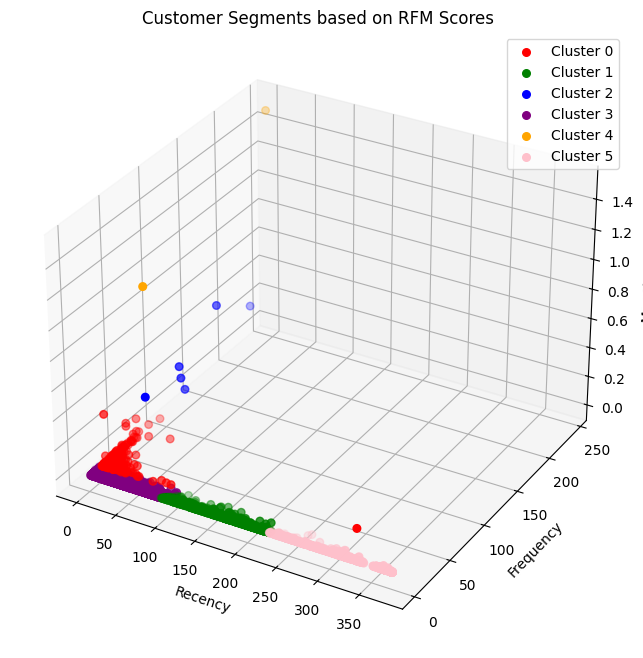

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot using matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map for different clusters
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink']

# Scatter plot for each cluster
for i in range(kmeans.n_clusters):
    ax.scatter(rfm_df[clusters == i]['Recency'],
               rfm_df[clusters == i]['Frequency'],
               rfm_df[clusters == i]['Monetary'],
               c=colors[i], label=f'Cluster {i}', s=30)

# Labeling the axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Title and legend
ax.set_title('Customer Segments based on RFM Scores')
ax.legend()

plt.show()

## Segment Profiling

In [ ]:
# How many customers do we have in each segment?
print("Best Customers(Bought most recently and most often, and spend the most): ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers(Buy most frequently): ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders(Spend the most):  ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost(Haven’t purchased for some time, but purchased frequently and spend the most): ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers(Haven’t purchased for some time, but purchased frequently and spend the most): ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers(Last purchased long ago, purchased few, and spent little):  ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers(Bought most recently and most often, and spend the most):  500
Loyal Customers(Buy most frequently):  1067
Big Spenders(Spend the most):   1091
Almost Lost(Haven’t purchased for some time, but purchased frequently and spend the most):  82
Lost Customers(Haven’t purchased for some time, but purchased frequently and spend the most):  19
Lost Cheap Customers(Last purchased long ago, purchased few, and spent little):   415


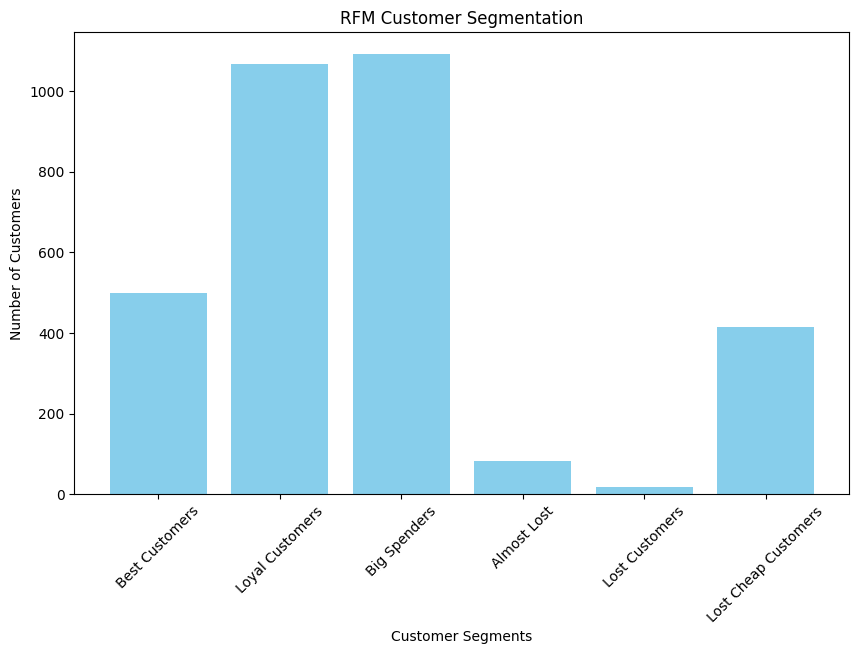

In [3]:
import matplotlib.pyplot as plt

rfm_counts = {
    "Best Customers": 500,  
    "Loyal Customers": 1067,  
    "Big Spenders": 1091,  
    "Almost Lost": 82,  
    "Lost Customers": 19,  
    "Lost Cheap Customers": 415 
}

plt.figure(figsize=(10, 6))
plt.bar(rfm_counts.keys(), rfm_counts.values(), color='skyblue')
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers')
plt.title('RFM Customer Segmentation')
plt.xticks(rotation=45)
plt.show()

## Marketing Recommendations

To provide marketing recommendations for different customer segments, we first need to identify and understand these segments within dataset. Generally, customer segmentation is done based on certain criteria such as purchasing behavior, demographics, customer lifetime value, etc.


**Best Customers:**

Prioritize personalized service and communication.
Offer exclusive deals or early access to new products.
Involve them in loyalty programs or customer feedback initiatives.

**Loyal Customers:**

Engage with regular updates about products they often buy.
Implement a loyalty rewards program to encourage continued patronage.
Consider referral incentives to leverage their potential advocacy.

**Big Spenders:**

Offer premium customer service and personalized recommendations.
Create bundle offers on high-value products.
Introduce loyalty points systems based on spending.

**Almost Lost:**

Re-engage with personalized emails showing new offerings or discounts.
Conduct surveys or outreach to understand their needs or reasons for decreased engagement.
Offer special incentives to return, like exclusive discounts or loyalty points.

**Lost Customers:**

Send win-back campaigns with attractive offers.
Reach out for feedback to understand their reasons for disengagement.
Offer significant incentives for their return, possibly linking to products they used to buy.

**Lost Cheap Customers:**

Target with value-driven campaigns and cost-effective product options.
Engage through educational content about product value and benefits.
Offer entry-level promotions or discounts to encourage re-engagement.
These recommendations are tailored to each segment's characteristics and behaviors, aiming to maximize customer retention and revenue

### Question 1: Data Overview

In [5]:
#What is the size of the dataset in terms of the number of rows and columns?
print('Data Cleaned: ',df.shape)

#Can you provide a brief description of each column in the dataset?
print(df.columns)

#What is the time period covered by this dataset?
# Find the minimum and maximum dates
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Data Cleaned:  (399573, 9)
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Item Returned Indicator'],
      dtype='object')
Minimum Date: 2010-12-01 08:26:00
Maximum Date: 2011-12-09 12:50:00


### Question 2: Customer Analysis

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Item Returned Indicator'],
      dtype='object')
There are 4362 unique customers.


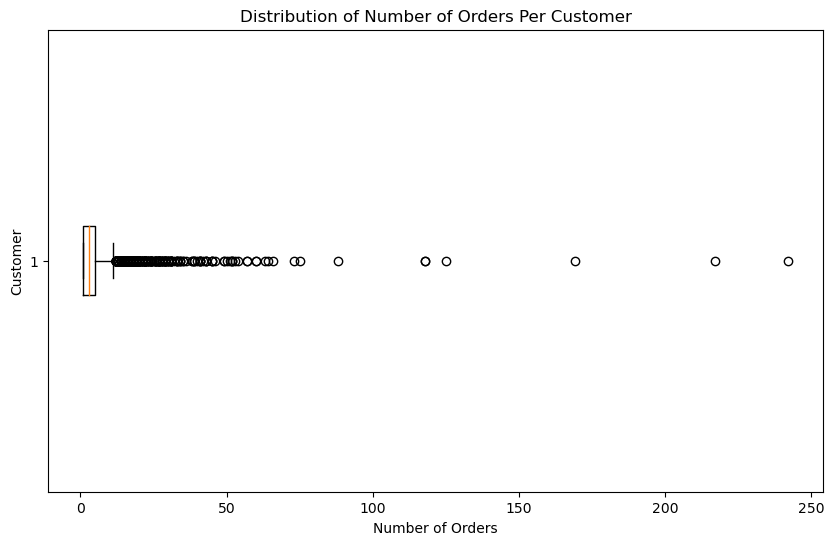

The top 5 customers who have made the most purchases by order count are:

CustomerID
14911.0    242
12748.0    217
17841.0    169
14606.0    125
13089.0    118
Name: InvoiceNo, dtype: int64


In [ ]:
# How many unique customers are there in the dataset?
print(df.columns)
unique_customers = df['CustomerID'].nunique()
print(f'There are {unique_customers} unique customers.')

# What is the distribution of the number of orders per customer?

orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Plot the distribution
# After plotting histogram, we found it not suitable for displaying distribution.
# Therefore, we use boxplot for distribution.
# We can found most of the customers has <30 number of orders, where there are still many outliers we can identify from the boxplot.
# Those outliers should be considered as loyal customer.
plt.figure(figsize=(10, 6))
plt.boxplot(orders_per_customer, vert=False)
plt.title('Distribution of Number of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Customer')
plt.show()

# Can you identify the top 5 customers who have made the most purchases by order count?

# Yes.
# The top 5 customers who have made the most purchases by order count are:
# Customer ID: 14911.0, 242 orders; 12748.0, 217 orders;
# 17841.0, 169 orders; 14606.0, 125 orders; and 13089.0, 118 orders

# Sort the customers based on the number of orders in descending order
sorted_customers = orders_per_customer.sort_values(ascending=False)

# Get the top 5 customers
top_5_customers = sorted_customers.head(5)
print('The top 5 customers who have made the most purchases by order count are:\n')
print(top_5_customers)

### Question 3: Product Analysis

In [ ]:
# What are the top 10 most frequently purchased products?
top10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 most frequently purchased products are: ")
print(top10_products)

# What is the average price of products in the dataset?
average_unit_price = df['UnitPrice'].mean()
print(f"\nAverage price of products in the dataset is {average_unit_price:.2f}")

# Can you find out which product category generates the highest revenue?
df['TotalCost'] = df['Quantity'] * df['UnitPrice']
highest_revenue_catogory = df.groupby('Description')['TotalCost'].sum().idxmax()
print("\nProduct category generating the highest revenue:", highest_revenue_catogory)


Top 10 most frequently purchased products are: 
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64

Average price of products in the dataset is 2.91

Product category generating the highest revenue: REGENCY CAKESTAND 3 TIER


### Question 4: Time Analysis

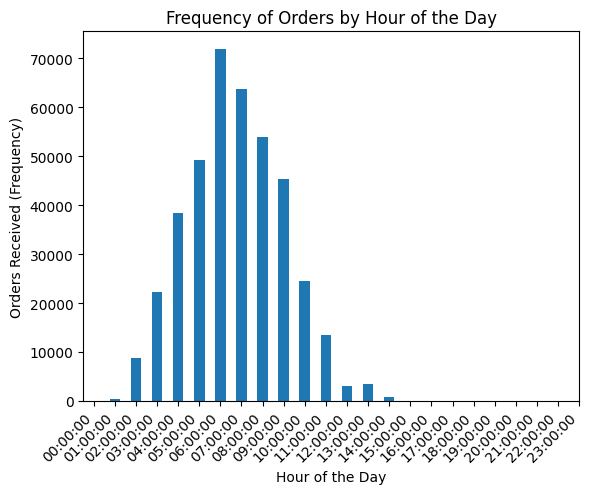

In [ ]:
#Analysis 1: Is there a specific day of the week or time of day when most orders are placed?

#Selected Hours from the 'InvoiceDate' column and used it to create a new column 'Hour of Day'
df['Hour of Day'] = df['InvoiceDate'].dt.hour

#Grouped by time of day and counted the number of data points
counts_by_hour = df.groupby('Hour of Day').size()

#Converted the groupby above to a new dataframe for plot
counts_df = pd.DataFrame(counts_by_hour, columns=['Count'])

figsize=(10, 6)
ax = counts_df.plot(kind='bar',legend=False)
plt.xlabel('Hour of the Day')
plt.ylabel('Orders Received (Frequency)')
plt.title('Frequency of Orders by Hour of the Day')
#Readjusted the X-axis to show all hours of day regardless of presence for frequency
hours = pd.date_range('00:00', '23:00', freq='H').time
ax.set_xticks(range(len(hours)))
ax.set_xticklabels(hours, rotation=45, ha='right')
plt.show()

#To graph the frequency of orders by time of the day, the column 'InvoiceDate' was used to create a new column to classify the transaction orders by
#the hour of day by which it happened (the new column is hence named 'Hour of Day'). The hour of day by which orders appear to be the most frequent is
#around early morning from 6:00 to 10:00, with the most number of orders occuring in the early hours of 6:00-7:00 AM.

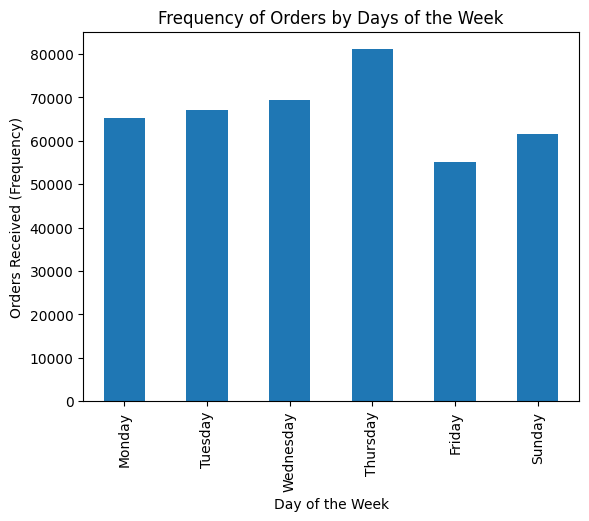

Number of orders on Monday: 65342
Number of orders on Tuesday: 67040
Number of orders on Wednesday: 69390
Number of orders on Thursday: 81120
Number of orders on Friday: 55153
Number of orders on Saturday: 0
Number of orders on Sunday: 61528


In [ ]:
#Selected Days from the 'InvoiceDate' column and used it to create a new column 'Day of Week'
df['Day of Week'] = df['InvoiceDate'].dt.day_name()

#Grouped by 'Day of Week' and counted the number of data points
counts_by_weekday = df.groupby('Day of Week').size()

#Converted the groupby above to a new dataframe for plot
weekday_df = pd.DataFrame(counts_by_weekday, columns=['Count'])

# Sort the DataFrame by day of the week in day of week order for x-axis
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']

figsize=(10, 6)
ax = weekday_df.loc[desired_order].plot(kind='bar', legend=False)
plt.xlabel('Day of the Week')
plt.ylabel('Orders Received (Frequency)')
plt.title('Frequency of Orders by Days of the Week')
plt.show()

#Checking Values For Each Day:
monday_count = df['Day of Week'].value_counts().get('Monday', 0)
print(f"Number of orders on Monday: {monday_count}")

tuesday_count = df['Day of Week'].value_counts().get('Tuesday', 0)
print(f"Number of orders on Tuesday: {tuesday_count}")

wednesday_count = df['Day of Week'].value_counts().get('Wednesday', 0)
print(f"Number of orders on Wednesday: {wednesday_count}")

thursday_count = df['Day of Week'].value_counts().get('Thursday', 0)
print(f"Number of orders on Thursday: {thursday_count}")

friday_count = df['Day of Week'].value_counts().get('Friday', 0)
print(f"Number of orders on Friday: {friday_count}")

saturday_count = df['Day of Week'].value_counts().get('Saturday', 0)
print(f"Number of orders on Saturday: {saturday_count}")

sunday_count = df['Day of Week'].value_counts().get('Sunday', 0)
print(f"Number of orders on Sunday: {sunday_count}")


In [ ]:
#Analysis 2: What is the average order processing time?

#There is no column in the dataset that provides the duration of the order time, hence there is no way to determine the average order processing time
#The only time-related column provided in the dataset is the 'InvoiceDate' column, which is assumed to only record the time and date for when the transaction is made
#If there were two columns for when the transaction request was made and successfully completed, then the ideal way to find the average order processing time would be to
#Convert the two columns first to todate format, and then convert the average time between the two columns to seconds to calculate the duration
#Can visualize the average duration of the time between the two via a box and whisker plot to show what the average duration of the processing order time is

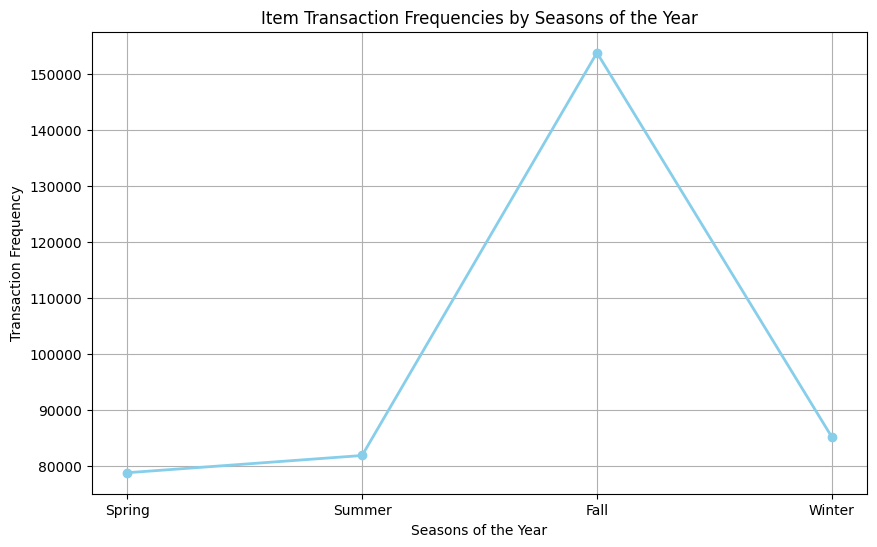

Number of orders in Spring: 78743
Number of orders in Summer: 81825
Number of orders in Fall: 153868
Number of orders in Winter: 85137


In [ ]:
#Analysis 3: Are there any seasonal trends in the dataset?
#Decide months for seasons: 3 months per season
#Spring: 3,4,5
#Summer: 6,7,8
#Fall: 9,10,11
#Winter: 12,1,2

#Created a new column 'Season' based on the months and classified accordingly to the specifications determined
df['Season'] = pd.cut(df['InvoiceDate'].dt.month, bins=[0, 2, 5, 8, 11, 12], labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], ordered=False)

# Counted the occurrences of each season
season_counts = df['Season'].value_counts()

#Set specific order of the seasons for plotting
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(10, 6))
plt.plot(season_order, season_counts[season_order], marker='o', color='skyblue', linestyle='-', linewidth=2)

plt.title('Item Transaction Frequencies by Seasons of the Year')
plt.xlabel('Seasons of the Year')
plt.ylabel('Transaction Frequency')
plt.grid(True)
plt.show()

spring_count = df['Season'].value_counts().get('Spring', 0)
print(f"Number of orders in Spring: {spring_count}")
summer_count = df['Season'].value_counts().get('Summer', 0)
print(f"Number of orders in Summer: {summer_count}")
fall_count = df['Season'].value_counts().get('Fall', 0)
print(f"Number of orders in Fall: {fall_count}")
winter_count = df['Season'].value_counts().get('Winter', 0)
print(f"Number of orders in Winter: {winter_count}")

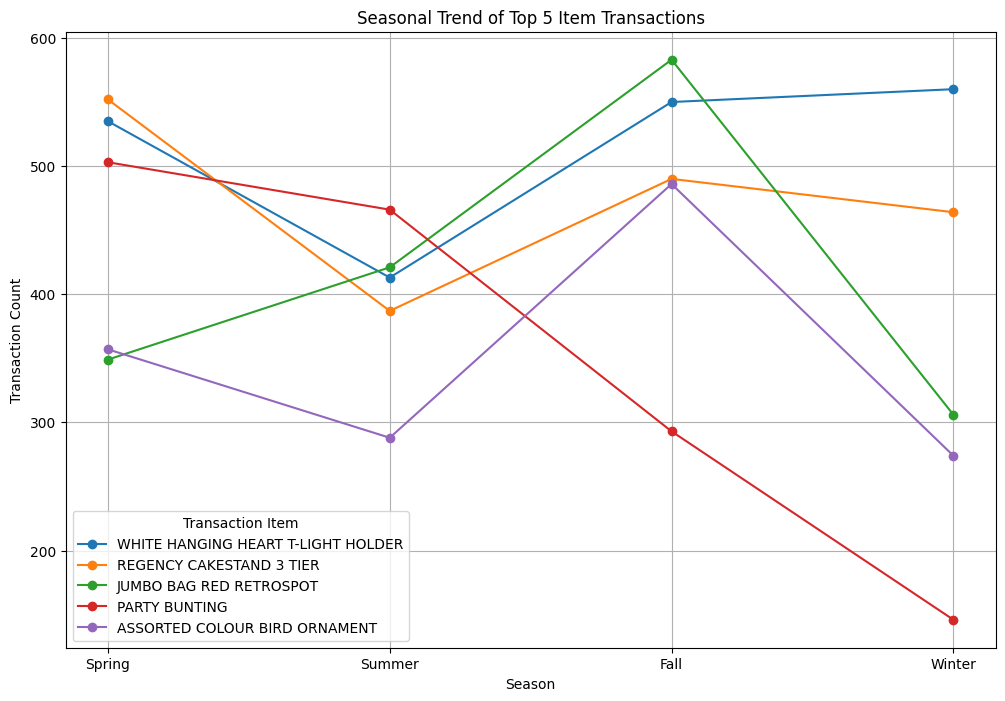

Description,ASSORTED COLOUR BIRD ORNAMENT,JUMBO BAG RED RETROSPOT,PARTY BUNTING,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER
Season,,,,,
Fall,486,583,293,490,550
Spring,357,349,503,552,535
Summer,288,421,466,387,413
Winter,274,306,146,464,560


In [ ]:
import warnings

#Created a new column 'Season' based on the months
df['Season'] = pd.cut(df['InvoiceDate'].dt.month, bins=[0, 2, 5, 8, 11, 12], labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], ordered=False)

#Counted the top 5 unique descriptions based on occurrence frequency
top_descriptions = df['Description'].value_counts().nlargest(5).index

#Filtered the DataFrame for the top 5 descriptions
df_top_descriptions = df[df['Description'].isin(top_descriptions)]

warnings.filterwarnings("ignore", category=FutureWarning)

#Counted the occurrence of each description in each season
seasonal_description_counts = df_top_descriptions.groupby(['Season', 'Description']).size().unstack()

warnings.resetwarnings()

#dDefine the specific order of seasons for plotting
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(12, 8))

for description in top_descriptions:
    plt.plot(season_order, seasonal_description_counts.loc[season_order, description], marker='o', label=description)

plt.title('Seasonal Trend of Top 5 Item Transactions')
plt.xlabel('Season')
plt.ylabel('Transaction Count')
plt.legend(title='Transaction Item', loc='lower left')
plt.grid(True)
plt.show()

#Counted the occurrences of each description in each season
warnings.filterwarnings("ignore", category=FutureWarning)
seasonal_description_counts = df_top_descriptions.groupby(['Season', 'Description']).size().unstack()
warnings.resetwarnings()
seasonal_description_counts

### Question 5: Geographical Analysis

In [ ]:
import seaborn as sns
# Question 5: Geographical Analysis
# Can you determine the top 5 countries with the highest number of orders?
# Yes

orders_per_country = df.groupby('Country')['InvoiceNo'].nunique()
sorted_countries = orders_per_country.sort_values(ascending=False)
top_5_countries = sorted_countries.head(5)

print("The top 5 countries ith the highest number of orders are:")
print(top_5_countries)

# Is there a correlation between the country of the customer and the average order value？
# We cannot conclude a correlation according to this data.
# Although customers from Neterlands have the highest average order value, it only have 9 customer records compared to
# 3942 in United Kingdom.
# All of the other countries have total customer count less than 100.
# Therefore ,this data is not enough to find a correlation between the country of customer and the average order value.
# It has no reference value since it is an online reatil where most of the customers from the same country.


df['TotalCost'] = df['Quantity'] * df['UnitPrice']

# Calculate the average order value for each country
average_order_value_per_country = df.groupby('Country')['TotalCost'].mean().reset_index()
sort = average_order_value_per_country.sort_values(by='TotalCost', ascending=False)
print("Average Order Value for Each Country:")
print(sort)

# Find the number of unique customers for each country
customer_count_per_country = df.groupby('Country')['CustomerID'].nunique().reset_index()

# Sort the DataFrame in descending order based on the number of customers
sorted_customer_count_per_country = customer_count_per_country.sort_values(by='CustomerID', ascending=False)

print("Number of Customers for Each Country (Descending Order):")
print(sorted_customer_count_per_country)


The top 5 countries ith the highest number of orders are:
Country
United Kingdom    19578
Germany             577
France              438
EIRE                311
Belgium             117
Name: InvoiceNo, dtype: int64
Average Order Value for Each Country:
                 Country   TotalCost
23           Netherlands  121.874265
0              Australia  109.275738
19                 Japan   99.774056
31                Sweden   80.656904
9                Denmark   48.112373
21             Lithuania   47.458857
29             Singapore   42.420419
20               Lebanon   37.641778
4                 Brazil   35.737500
10                  EIRE   33.487034
2                Bahrain   32.258824
15                Greece   31.165634
24                Norway   30.493824
17                Israel   28.293117
32           Switzerland   28.138578
12               Finland   28.029923
34  United Arab Emirates   27.832537
6        Channel Islands   26.497859
8         Czech Republic   23.990000
16    

### Question 6: Payment Analysis

There is no column in the dataset that provides payment methods, hence there is no way to determine the payment analysis.

Randomizing data wont be helpful because for questions such as profit. it might lead to loss, and finding data online for these specfic data is not possible, so this question is skipped.

### Question 7: Customer Behavior

In [9]:
#How long, on average, do customers remain active (between their first and last purchase)?

# Calculate the duration between the first and last purchase for each customer
customer_durations = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
print(customer_durations)

# Calculate the average duration
average_duration = (customer_durations['max'] - customer_durations['min']).mean()

print("\nAverage duration between first and last purchase:", average_duration)

                           min                 max
CustomerID                                        
12346.0    2011-01-18 10:01:00 2011-01-18 10:17:00
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00
...                        ...                 ...
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00
18282.0    2011-08-05 13:35:00 2011-12-02 11:43:00
18283.0    2011-01-06 14:14:00 2011-12-06 12:02:00
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00

[4362 rows x 2 columns]

Average duration between first and last purchase: 133 days 13:41:17.634112792


In [ ]:
# Are there any customer segments based on their purchase behavior?
# This is done in previous Task 4.

### Question 8: Returns and Refunds

In [10]:
#we will identify cancelled transactions by filtering the rows where the InvoiceNo starts with "C".

df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions

print(f"The percentage of cancelled (refunded) transactions in this dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled (refunded) transactions in this dataset is: 2.13%


In [11]:
#Is there a correlation between the product category and the likelihood of returns?
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
df1 = pd.merge(df, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
df1['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
df1['Cancellation_Rate'] = df1['Cancellation_Frequency'] / total_transactions['InvoiceNo']

df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Item Returned Indicator,Transaction_Status,Cancellation_Frequency,Cancellation_Rate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Item Purchased,Completed,1.0,0.500000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased,Completed,1.0,0.142857
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Item Purchased,Completed,1.0,0.250000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased,Completed,1.0,1.000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased,Completed,1.0,1.000000


In [12]:
sorted_df = df1.sort_values(by='Cancellation_Rate', ascending=False)
print("Sorted DataFrame by Cancellation Rate:")
print(sorted_df[['Description', 'Cancellation_Rate']])

Sorted DataFrame by Cancellation Rate:
                               Description  Cancellation_Rate
1492       HOT WATER BOTTLE I AM SO POORLY               45.0
1480      PINK HEART DOTS HOT WATER BOTTLE               45.0
1454            SKULLS AND CROSSBONES WRAP               45.0
1494          SCOTTIE DOG HOT WATER BOTTLE               45.0
1471    PINK CREAM FELT CRAFT TRINKET BOX                45.0
...                                    ...                ...
399568         PACK OF 20 SPACEBOY NAPKINS                NaN
399569        CHILDREN'S APRON DOLLY GIRL                 NaN
399570       CHILDRENS CUTLERY DOLLY GIRL                 NaN
399571     CHILDRENS CUTLERY CIRCUS PARADE                NaN
399572       BAKING SET 9 PIECE RETROSPOT                 NaN

[399573 rows x 2 columns]


There appears no evident correlation between the product category and the likelihood of returns, but we observe that Item HOT WATER BOTTLE I AM SO POORLY, PINK HEART DOTS HOT WATER BOTTLE and SKULLS AND CROSSBONES WRAP have the highest cancellation/refunded rate in this dataset.

### Question 9: Profitability Analysis

In [ ]:
data = df
# Profitability Analysis
# Note that in this dataset we do not have products' cost, assuming the sales are the profit
# Calculating the profit for each item
data['Profit'] = data['Quantity'] * data['UnitPrice']

# Calculating the total profit
total_profit = data['Profit'].sum()

# Calculating profit margin for each product
# Profit margin is calculated as (Profit / Total Revenue) * 100
# Grouping data by 'StockCode' and 'Description' to get total profit and total revenue per product
product_profit = data.groupby(['StockCode', 'Description']).agg({'Profit': 'sum', 'UnitPrice': 'mean'})
product_profit['ProfitMargin'] = (product_profit['Profit'] / (product_profit['UnitPrice'] * data['Quantity'].sum())) * 100

# Sorting products by profit margin
top_products_profit_margin = product_profit.sort_values(by='ProfitMargin', ascending=False).head(5)

total_profit, top_products_profit_margin.reset_index()


(8264264.929999996,
   StockCode                         Description    Profit  UnitPrice  \
 0     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS  13304.49   0.292034   
 1    85099B             JUMBO BAG RED RETROSPOT  83056.52   2.013140   
 2     84879       ASSORTED COLOUR BIRD ORNAMENT  56331.91   1.680776   
 3    85123A  WHITE HANGING HEART T-LIGHT HOLDER  93767.80   2.891020   
 4     21212     PACK OF 72 RETROSPOT CAKE CASES  16235.30   0.547957   
 
    ProfitMargin  
 0      0.934718  
 1      0.846477  
 2      0.687638  
 3      0.665454  
 4      0.607896  )

**Total Profit Generated:**

The total profit generated by the company during the dataset's time period is approximately 8264264.9

**Top 5 Products with Highest Profit Margins:**

World War 2 Gliders (StockCode 84077): Profit 13304.49, with a profit margin of about 0.93%.

Jumbo Bag Red Retrospot (StockCode 85099B): Profit  83056.52, with a profit margin of approximately 0.85%.

Assorted Colour Bird Ornament (StockCode 84879): Profit 56331.91, with a profit margin of 0.69%.

Popcorn Holder (StockCode 22197): Profit 93767.8, with a profit margin of 0.67%.

White Hanging Heart T-Light Holder (StockCode 85123A): Profit 16235.3, with a profit margin of 0.61%.

### Question 10: Customer Satisfaction

It appears that the dataset does not contain any columns directly related to customer feedback, ratings, or reviews. Therefore, we are unable to conduct an analysis of customer satisfaction based on this data. we can generate some synthetic data for customer reviews.

In [ ]:
import numpy as np
import random

# Setting a random seed for reproducibility
random.seed(0)
np.random.seed(0)

# Generating synthetic review data
# Assuming a normal distribution for ratings, centered around 4, with a standard deviation of 1
# Truncating values to the range [1, 5]
ratings = np.random.normal(loc=4, scale=1, size=len(data))
ratings = np.clip(ratings, 1, 5)

# Generating synthetic review texts
review_texts = ["Excellent product!", "Very good", "Average, not bad", "Below expectations", "Poor quality"]
synthetic_reviews = [random.choice(review_texts) for _ in range(len(data))]

# Adding the synthetic review data to the dataset
data['Rating'] = ratings
data['ReviewText'] = synthetic_reviews

# Displaying the updated dataset with synthetic review data
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Item Returned Indicator,Profit,Rating,ReviewText
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Item Purchased,15.30,5.000000,Below expectations
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased,20.34,4.400157,Below expectations
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Item Purchased,22.00,4.978738,Excellent product!
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased,20.34,5.000000,"Average, not bad"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Item Purchased,20.34,5.000000,Poor quality


In [ ]:
# Rating Analysis
# Calculating the average rating
average_rating = data['Rating'].mean()

# Distribution of ratings
rating_distribution = data['Rating'].value_counts(normalize=True).sort_index()

average_rating, rating_distribution

(3.919240723469767,
 1.000000    0.001344
 1.000820    0.000003
 1.001427    0.000003
 1.001429    0.000003
 1.002094    0.000003
               ...   
 4.999922    0.000003
 4.999933    0.000003
 4.999937    0.000003
 4.999970    0.000003
 5.000000    0.159067
 Name: Rating, Length: 335479, dtype: float64)

In [ ]:
# Sentiment Analysis of Review Texts

# Defining sentiment categories
sentiment_categories = {
    "Excellent product!": "Positive",
    "Very good": "Positive",
    "Average, not bad": "Neutral",
    "Below expectations": "Negative",
    "Poor quality": "Negative"}

# Assigning sentiments to review texts
data['Sentiment'] = data['ReviewText'].map(sentiment_categories)

# Distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts(normalize=True)

sentiment_distribution

Positive    0.400285
Negative    0.399549
Neutral     0.200166
Name: Sentiment, dtype: float64

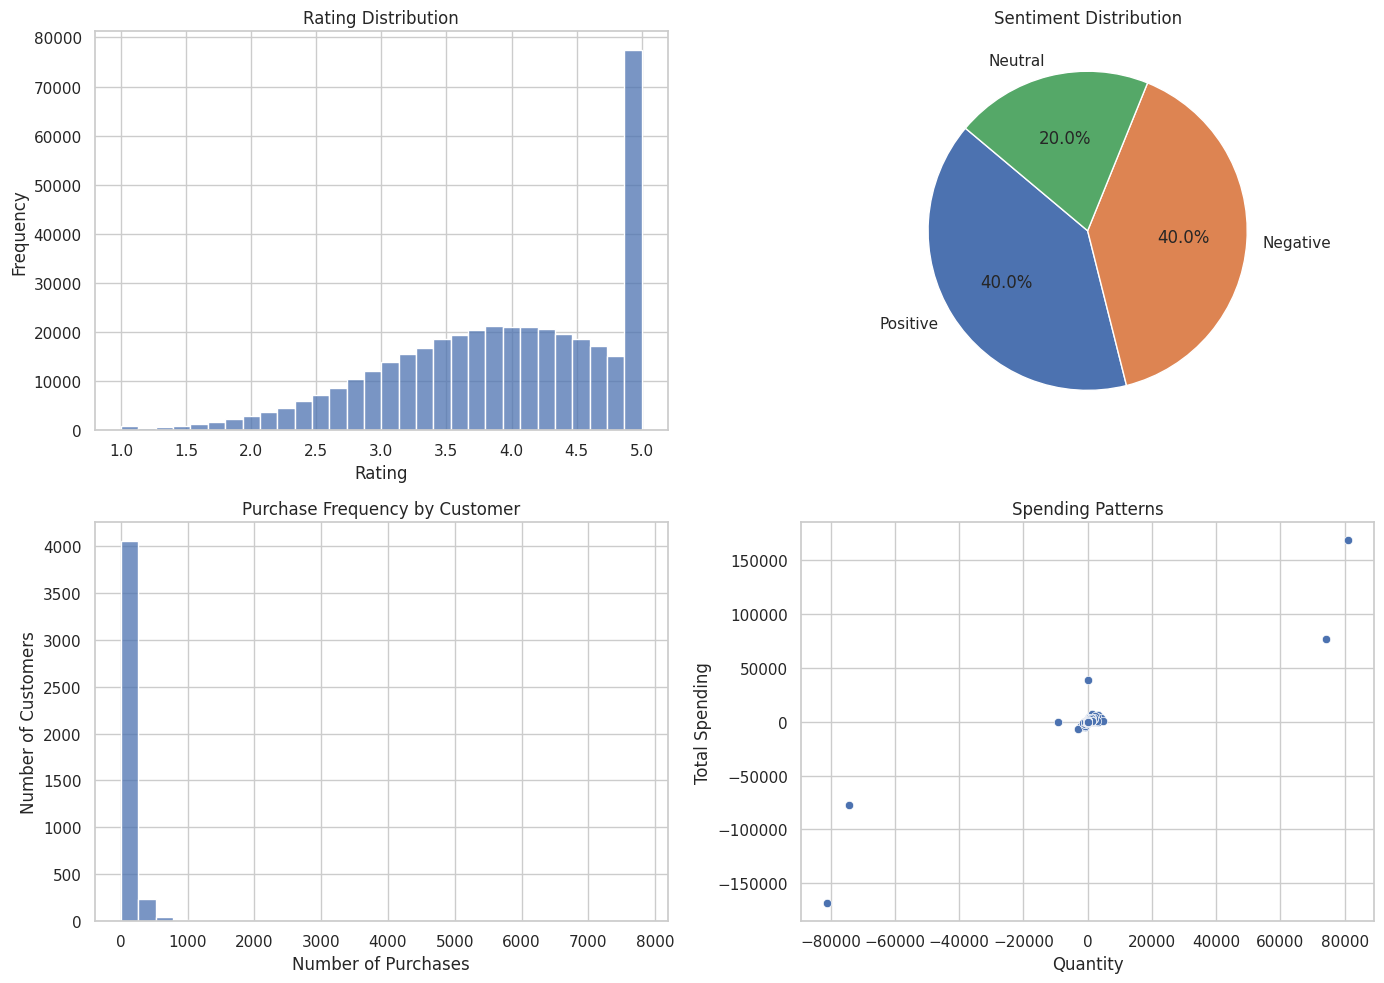

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Rating Distribution
sns.histplot(data['Rating'], bins=30, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Sentiment Distribution
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=axes[0, 1])
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Sentiment Distribution')

# Plot 3: Purchase Frequency by Customer
purchase_frequency = data['CustomerID'].value_counts()
sns.histplot(purchase_frequency, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Purchase Frequency by Customer')
axes[1, 0].set_xlabel('Number of Purchases')
axes[1, 0].set_ylabel('Number of Customers')

# Plot 4: Spending Patterns
data['TotalSpending'] = data['Quantity'] * data['UnitPrice']
sns.scatterplot(x='Quantity', y='TotalSpending', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Spending Patterns')
axes[1, 1].set_xlabel('Quantity')
axes[1, 1].set_ylabel('Total Spending')

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()
